In [1]:
import os
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import keras
from keras import layers
from PIL import Image

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.preprocessing.image import Iterator

from sklearn import decomposition
from sklearn import discriminant_analysis
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
train = []
train_gnd  = []
test = []
test_gnd = []
files  = glob.glob('../256_ObjectCategories/*/*.jpg')

j = 0
for i in range (0,len(files)):

  if j%3==0:

    im = keras.preprocessing.image.load_img(files[i],target_size=(100,100))
    im = keras.preprocessing.image.img_to_array(im)
    test_gnd.append(files[i][-12:-9])
    test.append(im)
    j=1

  else:
    im = keras.preprocessing.image.load_img(files[i],target_size=(100,100))
    im = keras.preprocessing.image.img_to_array(im)
    train_gnd.append(files[i][-12:-9])
    train.append(im)
    j=j+1

train_gnd = np.array(train_gnd)
train = np.array(train)
test = np.array(test)
test_gnd = np.array(test_gnd)
train = train.astype('float32') / 255
train_gnd = train_gnd.astype('int64')
test_gnd = test_gnd.astype('int64')
test = test.astype('float32') / 255

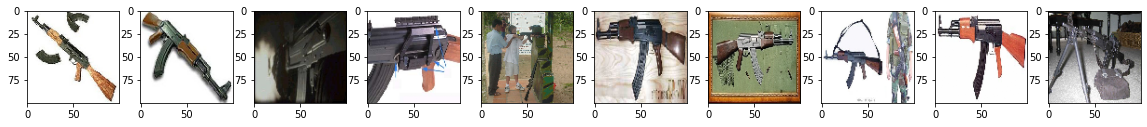

In [3]:
fig = plt.figure(figsize=[20, 20])
for i in range(10):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(train[i])

In [4]:
Train = train.reshape(len(train),-1)
Test = test.reshape(len(test),-1)

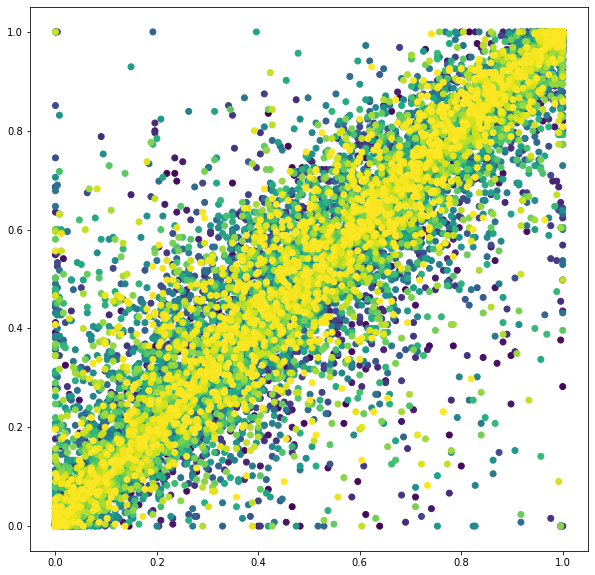

In [5]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Train[:,0], Train[:,1], c=train_gnd);

In [6]:
kmeans = KMeans(n_clusters = 257).fit(Train)

Text(0.5, 1.0, '257 Cluster KMeans')

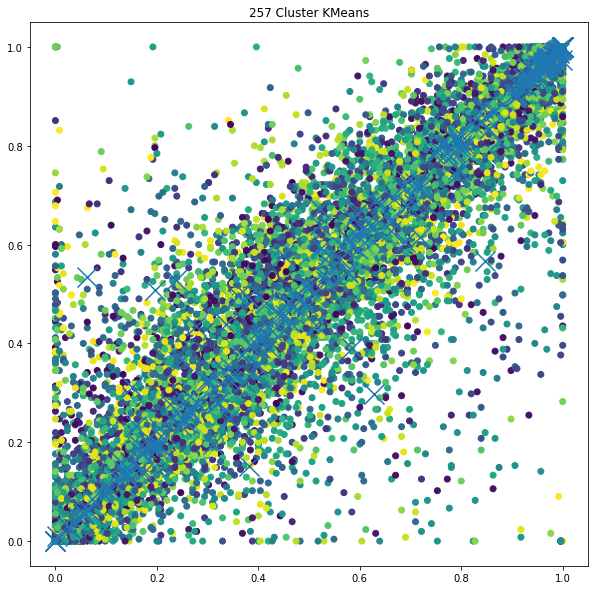

In [7]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Train[:,0], Train[:,1], c=kmeans.labels_);
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=400)
ax.set_title('257 Cluster KMeans')

In [8]:
def retrieve_info(cluster_labels,y_train):
#Associates most probable label with each cluster in KMeans model
 #returns: dictionary of clusters assigned to each label'''
# Initializing
  reference_labels = []
# For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels.append(num)
  return reference_labels

In [9]:
reference_labels = retrieve_info(kmeans.labels_,train_gnd)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [10]:
print(accuracy_score(number_labels,train_gnd))

0.13139580474416782
